## A/B TESTING WITH MACHINE LEARNING
A/B testing is a strategy that determines how a change in one variable impacts the audience or user engagement.It’s a commonly used strategy for improving campaigns and target conversion rates in marketing, web design, product development, and user experience design. Most machine learning models are typically trained on training data in an offline or local environment, As a result, models will frequently experiences drift. Data scientists have suggested A/B testing as an optimisation strategy to improve the creation and deployment of machine learning models.  

## Import the libraries and the dataset

In [10]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

from data_Preprocess import CleanDataFrame
from data_info import DataInfo 
from VisualisationPlots import VisualiseDf


## Exploring the dataset that we have

In [11]:
# importing dataset
df = pd.read_csv("../dataOld/AdSmartABdata.csv")
df.head()


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [12]:
# getting users who only answers yes or no
response = df[df['yes'] == 1].append(df[df['no'] == 1])
response.head(5)

C:\Users\Ekubay\AppData\Local\Temp/ipykernel_10704/591064240.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response = df[df['yes'] == 1].append(df[df['no'] == 1])


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [13]:
# merge the yes and no columns into a single response column
df1 = response[response['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = response[response['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
response_clean = df1.append(df2).reset_index(drop=True)
response_clean.head(5)

C:\Users\Ekubay\AppData\Local\Temp/ipykernel_10704/2934469433.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_clean = df1.append(df2).reset_index(drop=True)


,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
2,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
3,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
4,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1


In [14]:
# save
response_clean.to_csv('../data/clean_AdSmartABdata.csv')

* Here at this point, a first version of the data into gdrive was saved. 

<img src="../data/push_v1.jpg"
     alt="version1"
     style="float:left;margin-right:10px;">

In [15]:
# One hot encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# 
response_clean['experiment'] = label_encoder.fit_transform(response_clean['experiment'])
response_clean['date'] = label_encoder.fit_transform(response_clean['date'])
response_clean['hour'] = label_encoder.fit_transform(response_clean['hour'])
response_clean['device_make'] = label_encoder.fit_transform(response_clean['device_make'])
response_clean['platform_os'] = label_encoder.fit_transform(response_clean['platform_os'])
response_clean['browser'] = label_encoder.fit_transform(response_clean['browser'])
response_clean['response'] = label_encoder.fit_transform(response_clean['response'])

In [16]:
# browser only df
browser_df = response_clean[["experiment", "date", "hour", "device_make", "browser", "response"]]
browser_df.to_csv("../data/clean_AdSmartABdata.csv")

* browser only df was saved using dvc from bash terminal. So thats why there are two folders the first one is for the first versioning as shown above.

<img src="../data/browser_encoded.jpg"
     alt="Browser encoded V1"
     style="float:left;margin-right:10px;">

In [17]:
# and do the same to get 'platform_df'
platfrom_df = response_clean[["experiment", "date" , "hour", "device_make", "platform_os", "response"]]
platfrom_df.to_csv("../data/clean_AdSmartABdata.csv")

* Platform encoded V1

<img src="../data/platformEncV1.jpg"
alt="Browser encoded V1"
style="float:left;margin-right:10px;">

# Splitting the data for training


In [18]:
# For browser df: X1: prediction freatures,y1:target feature
X1 = browser_df.drop('response', axis=1) #prediction feature
y1 = browser_df['response'] #target feature
# 
# For Platform df: X11: prediction freatures,y11:target feature
X11 = platfrom_df.drop('response', axis=1) #prediction features
y11 = platfrom_df['response'] #target feature

In [19]:
# Splitting our dataset into training and testing dataset
#training set 70%, 20% validation, test set 10%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.1, random_state=42)


# 1. Logistic regression

### 1.1 using Browser df

* Cross validation is a statistical method used to estimate the skill of machine learning models. For a k-fold cross validation, there are common tactics that can be used to choose k. In our case k = 5.

In [20]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_log = log.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y1_test[0:10])

Predicted: [0 0 1 0 0 0 0 0 1 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [21]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X1_train,y1_train) 
scores=cross_val_score(estimator=regressor,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54017857 0.52678571 0.57589286 0.53363229 0.52914798]
Mean LogisticRegression score : 0.5411274823830878


In [22]:
# save score
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.540179
1,0.526786
2,0.575893
3,0.533632
4,0.529148


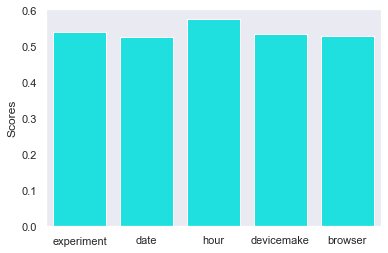

In [23]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','browser'],y="Scores",data=scores1, color="cyan")
plt.show()
sns.set()

In [24]:
#feature coefficients
regressor.fit(X1 / np.std(X1, 0), y1)
print(regressor.coef_)

[[ 0.05343081 -0.00484439  0.1299312   0.06868544 -0.05886028]]


In [25]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10595
Feature: 1, Score: -0.00185
Feature: 2, Score: 0.02261
Feature: 3, Score: 0.00247
Feature: 4, Score: -0.02966


### *So the most important feature in this model is feature 2 (hour) with a score of 0.02261.

## Analysis of p-value

In [26]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X1_train, y1_train)
list(pvalues)

[0.6321163576102287,
 0.862695922775575,
 0.00038761834136199694,
 0.005793188708905142,
 0.6136439245647207]

### P-value should be less than 0.05
- hour is the most signifcant, 00038761834136199694 which is less than 0.05
- devicemake is the second most, 005793188708905142 significant 
### generally the hour and devicemake are the most contributor to making awareness on the new application

### 1.2 Using platform df

In [17]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X11_train,y11_train) 
scores=cross_val_score(estimator=regressor,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54464286 0.54017857 0.57142857 0.52017937 0.53363229]
Mean LogisticRegression score : 0.542012331838565


In [18]:
# saving the output to a pandas dataframe
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.544643
1,0.540179
2,0.571429
3,0.520179
4,0.533632


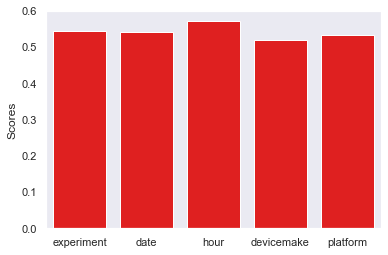

In [19]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','platform'],y="Scores",data=scores1, color="red")
plt.show()
sns.set()

In [20]:
#feature coefficients
regressor.fit(X11 / np.std(X11, 0), y11)
print(regressor.coef_)

[[ 0.05509583 -0.0055177   0.12475151  0.06072356  0.09600945]]


In [28]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X11, y11)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11122
Feature: 1, Score: -0.00205
Feature: 2, Score: 0.02186
Feature: 3, Score: 0.00193
Feature: 4, Score: 0.63366


* Again, the most important feature in this model is feature 2 (hour) with a score of 0.02186.

In [50]:
#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import LogesticRegressionModel
LRModel = LogesticRegressionModel(X1_train, X1_test,  y1_train, y1_test)
clf2, loss_arr_2, acc_arr_2 = LRModel.train(5)
LRModel.write_model('browser_os_Logestic_Reg_model', clf2)

step 0: Validation Accuracy of LogesticRegression is: 0.549
step 0: Validation Loss of LogesticRegression is: 0.671

step 1: Validation Accuracy of LogesticRegression is: 0.513
step 1: Validation Loss of LogesticRegression is: 0.698

step 2: Validation Accuracy of LogesticRegression is: 0.540
step 2: Validation Loss of LogesticRegression is: 0.678

step 3: Validation Accuracy of LogesticRegression is: 0.502
step 3: Validation Loss of LogesticRegression is: 0.706

step 4: Validation Accuracy of LogesticRegression is: 0.543
step 4: Validation Loss of LogesticRegression is: 0.676



### Analysis of the P-value

In [27]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X11_train, y11_train)
list(pvalues)

[0.6321163576102287,
 0.862695922775575,
 0.00038761834136199694,
 0.005793188708905142,
 0.8887605792397241]

### P-value should be less than 0.05
- hour is the most signifcant, 00038761834136199694 which is less than 0.05
- devicemake is the second most, 005793188708905142 significant 
#### generally the hour and devicemake are the most contributor to making awareness on the new application, the platform is the most insignificant  

# 2. XGBOOST

### 2.1 Using Browser Df

In [33]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X1_train, y1_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X1_test, y1_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X1_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y1_test[0:10])

C:\Users\Ekubay\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


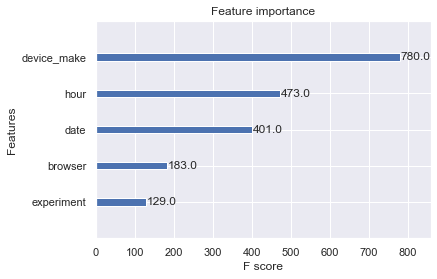

In [34]:
from xgboost import plot_importance
# fit model no training data
model = XGBClassifier()
model.fit(X1, y1)
# plot feature importance
plot_importance(model)
pyplot.show()

* Using this model, device_make is the most important feature in predicting the target variable response.

### 2.2 Using platform DF

In [36]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X11_train, y11_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X11_test, y11_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X11_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y11_test[0:10])

Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


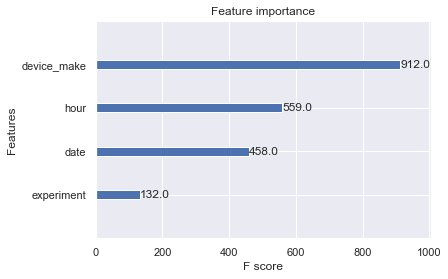

In [37]:
# fit model no training data
model = XGBClassifier()
model.fit(X11, y11)
# plot feature importance
plot_importance(model)
pyplot.show()

* For the same model, but using platform dataframe, again device_make is the most important feature in predicting the target variable response.

In [40]:
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import XGBClassifierModel

xGBClassifierModel = XGBClassifierModel(X1_train, X1_test,  y1_train, y1_test)
clf3, acc_arr, loss_arr = xGBClassifierModel.train(5)
xGBClassifierModel.write_model('browser_os_XGBoost_model', clf3)

## Analysis of the P-value

In [41]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X11_train, y11_train)
list(pvalues)

[0.6321163576102287,
 0.862695922775575,
 0.00038761834136199694,
 0.005793188708905142,
 0.8887605792397241]

### P-value should be less than 0.05
- hour is the most signifcant, 00038761834136199694 which is less than 0.05
- devicemake is the second most, 005793188708905142 significant 
#### generally the hour and devicemake are the most contributor to making awareness on the new application, the platform is the most insignificant  

# 3. Random forest

### 3.1 Using browser df

In [42]:
# Define Random forest Model
rf = RandomForestClassifier()
# We fit our model with our train data
rf.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_rf = rf.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y1_test[0:10])

Predicted: [0 0 1 1 1 1 0 1 0 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [43]:
#Applying k-fold Cross validation on random forest
clf = RandomForestClassifier()
clf.fit(X1_train,y1_train)
clf_scores=cross_val_score(estimator=clf,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(clf_scores)
print('Mean clf score :',clf_scores.mean())

[0.58482143 0.54017857 0.52678571 0.5470852  0.52466368]
Mean clf score : 0.5447069186418962


In [44]:
scores2 = pd.DataFrame(clf_scores,columns=['Scores2']) # saving the results into pandas dataframe
scores2.head()

,Scores2
0,0.584821
1,0.540179
2,0.526786
3,0.547085
4,0.524664


In [42]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.04681
Feature: 1, Score: 0.18781
Feature: 2, Score: 0.39676
Feature: 3, Score: 0.28338
Feature: 4, Score: 0.08524


* Random forest algorithm, using browser_dataframe, feature 3 (date) is the most important feature in predicting the target variable response.

### 3.2 Using platform DF

In [45]:
# Define Decision Tree Model
rf = RandomForestClassifier()
# We fit our model with our train data
rf.fit(X11_train, y11_train)
# Then predict results from X_test data
pred_rf = rf.predict(X11_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y11_test[0:10])

Predicted: [0 1 1 1 1 1 0 0 0 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [33]:
#Applying k-fold Cross validation on Decision tree
clf = RandomForestClassifier()
clf.fit(X11_train,y11_train)
clf_scores=cross_val_score(estimator=clf,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(clf_scores)
print('Mean clf score :',clf_scores.mean())

[0.56696429 0.51785714 0.5625     0.56502242 0.5470852 ]
Mean clf score : 0.5518858103779628


In [34]:
scores2 = pd.DataFrame(clf_scores,columns=['Scores2']) # saving the results into pandas dataframe
scores2.head()

,Scores2
0,0.566964
1,0.517857
2,0.562500
3,0.565022
4,0.547085


In [45]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.08030
Feature: 1, Score: 0.22469
Feature: 2, Score: 0.29988
Feature: 3, Score: 0.26875
Feature: 4, Score: 0.12637


* Random forest algorithm, using platform_dataframe, feature 3 (date) is the most important feature in predicting the target variable response.

In [49]:
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import RandomForest

RForest = RandomForest(X1_train, X1_test,  y1_train, y1_test)
clf3, acc_arr, loss_arr = RForest.train(5)
RForest.write_model('browser_os_RForest_model', clf3)

step 0: Validation Accuracy of RandomForest is: 0.562
step 0: Validation Loss of Randomforest is: 0.661

step 1: Validation Accuracy of RandomForest is: 0.531
step 1: Validation Loss of Randomforest is: 0.685

step 2: Validation Accuracy of RandomForest is: 0.504
step 2: Validation Loss of Randomforest is: 0.704

step 3: Validation Accuracy of RandomForest is: 0.552
step 3: Validation Loss of Randomforest is: 0.670

step 4: Validation Accuracy of RandomForest is: 0.529
step 4: Validation Loss of Randomforest is: 0.686



# Accuracy scores

In [46]:
##y1_test - Actual value
## pred_[model] = the values predicted above

# Logistic Regression
acc_log = accuracy_score(y1_test, pred_log)
# XGBoost 
acc_xgb = accuracy_score(y1_test, pred_xgb)
# Random Forest 
acc_rf = accuracy_score(y1_test, pred_rf)


print("Accuracy Scores")
print("---------------")

print("Logistic Regression:", acc_log)
print("XGBoost:", acc_xgb)
print("Random Forest:", acc_rf)

Accuracy Scores
---------------
Logistic Regression: 0.536
XGBoost: 0.536
Random Forest: 0.48


# So from the above scores we can conclude that both LR and XG boost yeild the best results while RF is the worst from the 3.

# General analysis 
- the two models, Logistic Regression and XGBoost have the same result: 0.536 so, we can use either of them 
- the p-value of each features has been calculated and should be lessthan 0.05 to declare as significant
 - Most of the features p-value is greater than 0.05
 - the feature `hour` have only satisfied to the p-value condition
 - the most contributer to make awareness on the new application is hour and 
 - the second most contributor is `devicemake`
- the accuracy of the model is too small

### From the above premises, there is no significant difference between both application based on the given data.